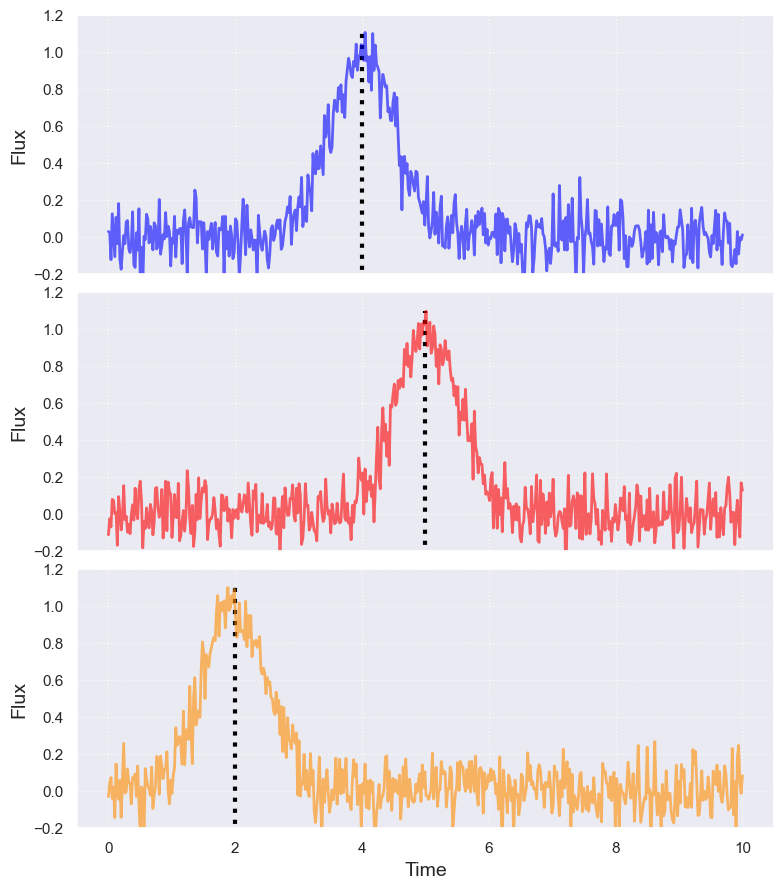

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Parameters
time = np.linspace(0, 10, 500)
peak_times = [4, 5, 2]  # Example peak times
wavelengths = ['X-ray', 'NIR', 'IR']
colors = ['blue', 'red', 'darkorange']  # Matplotlib default colors

# Generate synthetic Gaussian data with added noise
def gaussian_with_noise(t, peak_time, width=0.5, noise_level=0.1):
    signal = np.exp(-0.5 * ((t - peak_time) / width)**2)
    noise = np.random.normal(0, noise_level, size=t.shape)
    return signal + noise

fig, axes = plt.subplots(3, 1, figsize=(8, 9), sharex=True)

for ax, peak_time, label, color in zip(axes, peak_times, wavelengths, colors):
    ydata = gaussian_with_noise(time, peak_time)
    ax.vlines(peak_time, np.min(ydata), np.max(ydata), linestyle=':', color='black', linewidth=3)
    ax.plot(time, ydata, linewidth=2, color=color, alpha=0.6)
    ax.set_ylabel('Flux', fontsize=14)
    
    # ax.legend(loc='upper right', fontsize=12, frameon=False)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set_ylim(-0.2, 1.2)

axes[-1].set_xlabel('Time', fontsize=14)
plt.tight_layout()
plt.savefig('tmp.png')

plt.show()


/tmp/ipykernel_13800/4127016596.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


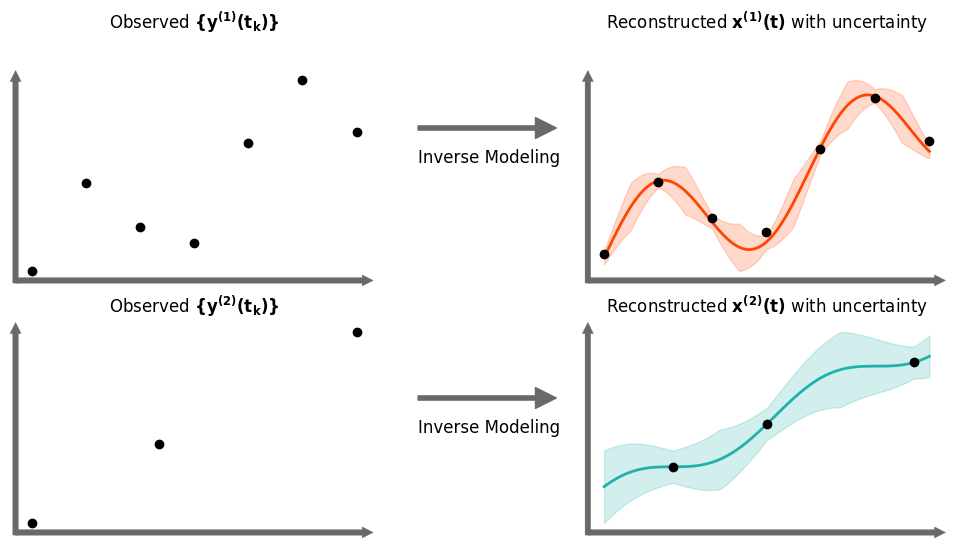

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Time domain
t = np.linspace(0, 10, 500)
true_curve1 = np.sin(t) * 0.8 + 0.2 * t
true_curve2 = np.cos(t + 100) * 1 + t

# Top graph: 7 evenly spaced observation points
obs_indices1 = np.linspace(0, len(t) - 1, 7, dtype=int)
t_obs1 = t[obs_indices1]
y_obs1 = true_curve1[obs_indices1] + np.random.normal(0, 0.1, size=t_obs1.shape)

# Bottom graph: 3 non-overlapping observation points (clustered differently)
obs_indices2 = np.array([105, 250, 475])  # Chosen to be in different regions than obs_indices1
t_obs2 = t[obs_indices2]
y_obs2 = true_curve2[obs_indices2] + np.random.normal(0, 0, size=t_obs2.shape) # Reduced noise for clearer visibility

# Define uncertainty as distance from nearest observation
def compute_uncertainty(t, t_obs, noise=0.1, addnoise=0.3):
    return noise + addnoise * np.min(np.abs(t[:, None] - t_obs[None, :]), axis=1)

uncertainty1 = compute_uncertainty(t, t_obs1)
uncertainty2 = compute_uncertainty(t, t_obs2, noise=1, addnoise=0.6)

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.6})

for ax in axs.flat:
    # Hide all default spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # --- Draw custom axis lines with arrows using ax.annotate ---
    # Define arrow properties for axes
    arrow_kws = dict(facecolor='dimgray', edgecolor='dimgray', shrink=0, linewidth=0.25, headwidth=8, headlength=8) # Increased head size

    # X-axis arrow (horizontal line)
    # xytext is the start of the arrow (left end of x-axis)
    # xy is the end of the arrow (right end of x-axis)
    ax.annotate("", xy=(1, 0), xytext=(0, 0),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=arrow_kws)

    # Y-axis arrow (vertical line)
    # xytext is the start of the arrow (bottom end of y-axis)
    # xy is the end of the arrow (top end of y-axis)
    ax.annotate("", xy=(0, 1), xytext=(0, -0.0125),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=arrow_kws)

# First column: only data points
axs[0, 0].scatter(t_obs1, y_obs1, color='black', zorder=5)
axs[1, 0].scatter(t_obs2, y_obs2, color='black', zorder=5)
axs[0, 0].text(0.5, 1.2, r"Observed $\mathbf{\{y^{(1)}(t_k)\}}$", fontsize=12, transform=axs[0, 0].transAxes, ha='center')
axs[1, 0].text(0.5, 1.05, r"Observed $\mathbf{\{y^{(2)}(t_k)\}}$", fontsize=12, transform=axs[1, 0].transAxes, ha='center')


# Second column: reconstructed curve with uncertainty
axs[0, 1].plot(t, true_curve1, color='#FF4500', lw=2)
axs[0, 1].fill_between(t, true_curve1 - uncertainty1, true_curve1 + uncertainty1, color='#FF4500', alpha=0.2)
axs[0, 1].scatter(t_obs1, y_obs1, color='black', zorder=5)
axs[0, 1].text(0.5, 1.2, r"Reconstructed $\mathbf{x^{(1)}(t)}$ with uncertainty", fontsize=12, transform=axs[0, 1].transAxes, ha='center')

axs[1, 1].plot(t, true_curve2, color='#20B2AA', lw=2)
axs[1, 1].fill_between(t, true_curve2 - uncertainty2, true_curve2 + uncertainty2, color='#20B2AA', alpha=0.2)
axs[1, 1].scatter(t_obs2, y_obs2, color='black', zorder=5)
axs[1, 1].text(0.5, 1.05, r"Reconstructed $\mathbf{x^{(2)}(t)}$ with uncertainty", fontsize=12, transform=axs[1, 1].transAxes, ha='center')

# --- Add arrows between columns (these remain the same as they were working) ---

# Arrow for the first row - using ax.annotate and figure fraction coordinates
axs[0, 0].annotate('',
             xy=(0.47, 0.70),  # Arrow tip position in figure coordinates (moved further right)
             xytext=(0.342, 0.70), # Arrow base position in figure coordinates (moved further left)
             xycoords='figure fraction',
             textcoords='figure fraction',
             arrowprops=dict(facecolor='dimgray', edgecolor='dimgray', shrink=0.05, width=3, headwidth=15, headlength=15))

fig.text(0.52, 0.72, "Inverse Modeling", ha='center', va='bottom', fontsize=12, transform=fig.transFigure)

# Arrow for the second row - using ax.annotate and figure fraction coordinates
axs[1, 0].annotate('',
             xy=(0.47, 0.25),  # Arrow tip position
             xytext=(0.342, 0.25), # Arrow base position
             xycoords='figure fraction',
             textcoords='figure fraction',
             arrowprops=dict(facecolor='dimgray', edgecolor='dimgray', shrink=0.05, width=3, headwidth=15, headlength=15))

fig.text(0.52, 0.27, "Inverse Modeling", ha='center', va='bottom', fontsize=12, transform=fig.transFigure)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cartooninterpolation.png', format='png')
plt.show()